# Loan Approval Prediction

## Problem Statement
The goal is to predict whether a loan application should be approved based on applicant information.

This is a binary classification problem where the model assists decision making.

---

## Business Objective
Banks must minimize risk while approving loans.
The model helps identify trustworthy applicants.

---

## Project Goals
- Handle categorical data
- Train classification models
- Evaluate using Recall and Precision
- Interpret feature importance


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
df=pd.read_csv("loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


DATA CLEANING

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#Fill categorical columns (use mode)
cat_cols = ["Gender","Married","Dependents","Self_Employed","Loan_Amount_Term","Credit_History"]

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

#Fill numeric column (LoanAmount → median)

df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())

df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Encoding

In [7]:
#Convert target column first
df["Loan_Status"] = df["Loan_Status"].map({"Y":1,"N":0})

#Label encode binary columns

binary_cols = ["Gender","Married","Education","Self_Employed","Property_Area"]
le=LabelEncoder()

for col in binary_cols:
    df[col]= le.fit_transform(df[col])

#Handle Dependents column

df["Dependents"] = df["Dependents"].replace("3+",3).astype(int)

#Drop Loan_ID (not useful)



In [8]:
df = df.drop("Loan_ID",axis=1)

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


TRAIN TEST SPLIT

In [9]:
X = df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

In [10]:
X_train , X_test,y_train, y_test = train_test_split(
    X,y, test_size=0.2,random_state=42
)

Scale numeric features

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression

Logistic Regression Accuracy: 0.7886178861788617
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



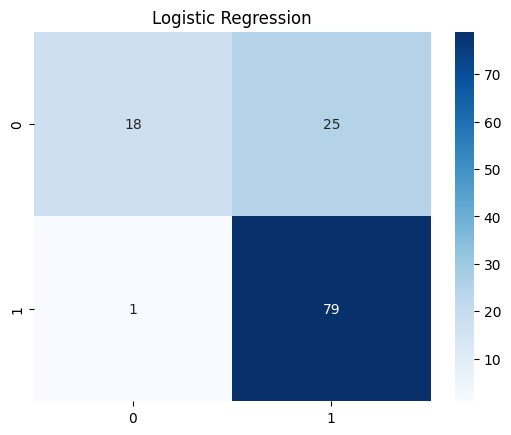

In [12]:
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression")
plt.show()

Decision Tree

Decision Tree Accuracy: 0.7479674796747967
              precision    recall  f1-score   support

           0       0.73      0.44      0.55        43
           1       0.75      0.91      0.82        80

    accuracy                           0.75       123
   macro avg       0.74      0.68      0.69       123
weighted avg       0.74      0.75      0.73       123



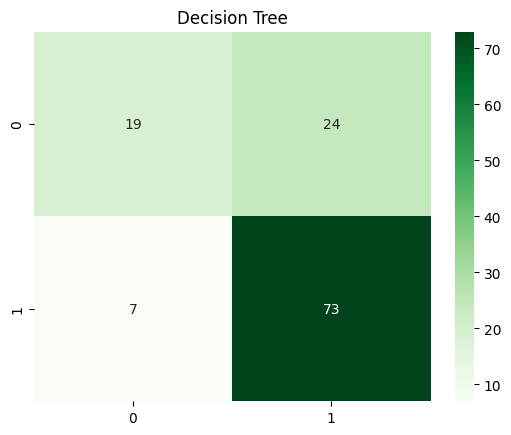

In [13]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, fmt="d", cmap="Greens")
plt.title("Decision Tree")
plt.show()

Random Forest

Random Forest Accuracy: 0.7642276422764228
              precision    recall  f1-score   support

           0       0.82      0.42      0.55        43
           1       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.76      0.74       123



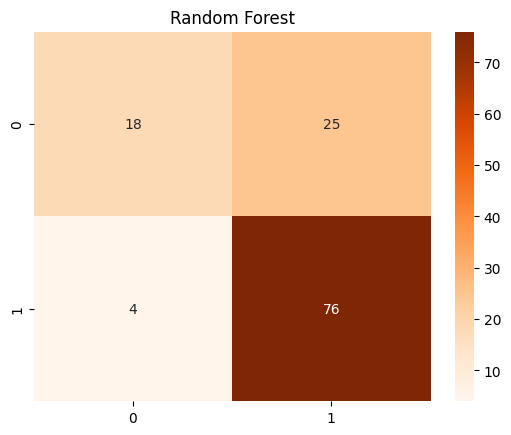

In [14]:

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt="d", cmap="Oranges")
plt.title("Random Forest")
plt.show()


## Model Selection Based on Business Objective

In loan approval prediction, the goal is to avoid approving risky applicants.

Therefore recall of the rejected class (0) is more important than overall accuracy.

| Model | Recall (Rejected) |
|------|------|
| Logistic Regression | 0.42 |
| Decision Tree | 0.44 |
| Random Forest | 0.42 |

The Decision Tree model detected the highest number of risky applicants and was selected as the final model.


Feature Importance

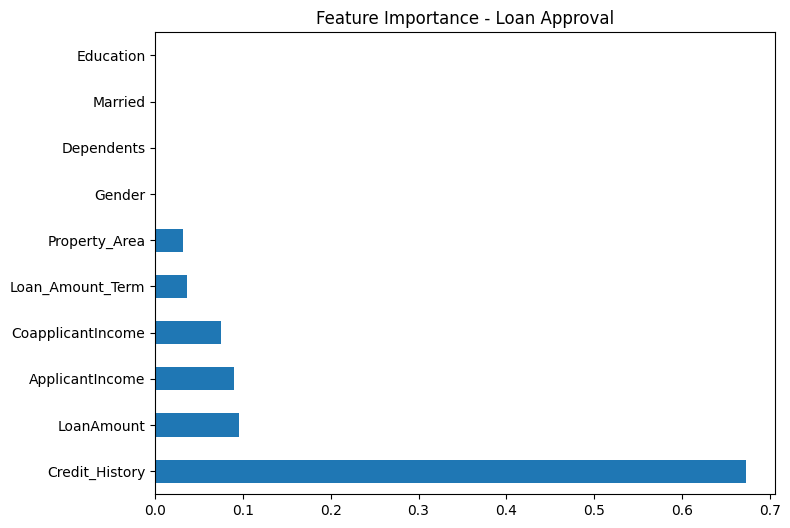

In [15]:
importance = pd.Series(dt.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).head(10).plot(kind="barh", figsize=(8,6))
plt.title("Feature Importance - Loan Approval")
plt.show()


## Feature Importance Interpretation

The most influential feature was Credit_History.

Applicants with good credit history are significantly more likely to receive loan approval.
This matches real banking decision logic where past repayment behavior is the strongest indicator of loan reliability.

The model therefore behaves realistically and is interpretable.


SAVE ALL MODELS

In [16]:
# pickle allows us to save python objects (like trained ML models)i
import pickle
# save logistic regression model
pickle.dump(lr,open("logistic.pkl","wb"))

# save decision tree model
pickle.dump(dt, open("decision_tree.pkl", "wb"))

# save random forest model
pickle.dump(rf, open("random_forest.pkl", "wb"))

# also save scaler because model expects scaled inputs
pickle.dump(scaler, open("scaler.pkl", "wb"))